# Esercizi 01

## 02.1 - Importance sampling

L'integrale da calcolare è $$I=\int_0^1 \frac{\pi}{2}\cos\left({\frac{\pi}{2}x}\right) dx$$

Sviluppando in serie di Taylor l'integranda attorno a $x=1$ si ottiene al primo ordine $d(x) \propto \frac{\pi^2}{4}(1-x)$, imponendo la normalizzazione:
$$d(x)=2(1-x)$$

Questa mi è sembrata la scelta migliore: $d(x)\geq0$ in $[0,1]$ e quindi si può normalizzare per ottenere effettivamente una distribuzione di probabilità. Se avessi sviluppato in serie di Taylor nell'origine, il termine lineare sarebbe stato nullo, mentre il termine quadratico sarebbe diventato negativo in un certo nullo in un certo intervallo contenuto in $[0,1]$. La scelta fatta ha poi il vantaggio di essere lineare (e quindi la cumulativa è facilmente invertibile) e, inoltre, essendo $x=1$ un punto di flesso per la funzione integranda, il termine quadratico dello sviluppo di Taylor è nullo ($\frac{\pi}{2}\cos\left({\frac{\pi}{2}x}\right)= \frac{\pi^2}{4}(1-x)+o((1-x)^2)$)

L'integrale che vogliamo calcolare è quindi
$$I=\int_0^1 \frac{\pi cos\left(\frac{\pi}{2}x\right)}{4(1-x)}d(x)dx$$
La distribuzione cumulativa è $y=F_x(x)=\int_0^{x}d(x)dx=2x-x^2$, che si può invertire per $x \in [0,1]$ ottenendo $$x=F_x^{-1}(y)=1-\sqrt{1-y}$$
Estraendo $y$ uniformemente in $[0,1)$ possiamo dunque ottenere una variabile casuale distribuita come $d(x)$.

Ho considerato i valori di $N=100$ blocchi, ciascuno ottenuto facendo la media di $100$ valutazioni della funzione integranda (diversa nei due casi). In totale sono quindi stati estratti $M=10000$ numeri casuali.

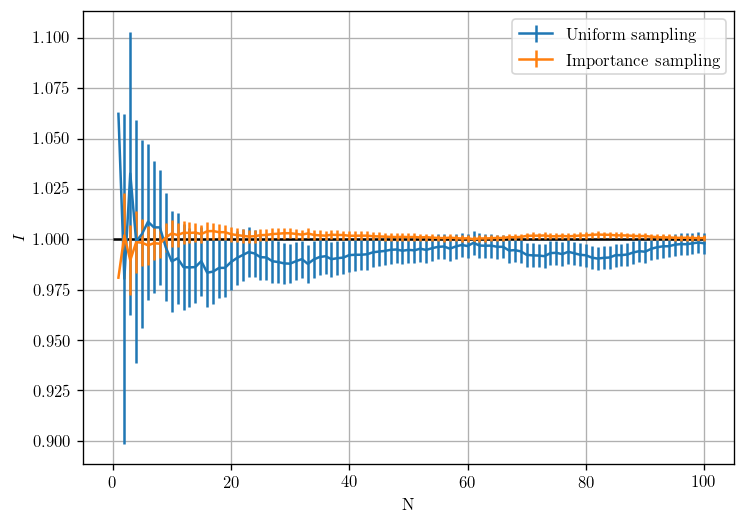

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

n_unif,avg_unif,err_unif=np.loadtxt("Ex_02_1/out_unif_02_1.txt", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="int,float,float", unpack=True)
n_imp,avg_imp,err_imp=np.loadtxt("Ex_02_1/out_imp_02_1.txt", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="int,float,float", unpack=True)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(7,5),dpi=120)
plt.hlines(1,0,100)
plt.errorbar(n_unif,avg_unif,yerr=err_unif, label="Uniform sampling")
plt.errorbar(n_imp,avg_imp,yerr=err_imp, label="Importance sampling")
plt.grid()
plt.xlabel("N")
plt.ylabel(r"$I$")
plt.legend()
plt.show()

Si può osservare che la convergenza è molto più veloce con l'importance sampling e la complicazione dovuta al cambiamento di distribuzione di probabilità da campionare è invece minima.

# 02.2 - Random Walks

Sono qui considerati i casi di random walk in uno spazio discreto e in uno spazio continuo. La differenza tra i due casi consiste nel fatto che la posizione del "walker" è, rispettivamente, un punto in $\mathbb{Z}^3$ o in $\mathbb{R}^3$. 
### Random walk discreto
La posizione del walker è vincolata a essere un punto in $\mathbb{Z}^3$ e può spostarsi soltanto in punti del reticolo adiacenti. I punti primi vicini sono ovviamente 6: rispetto alla sua posizione, il walker ad ogni step può spostarsi di una quantità fissa $a$ (la distanza reticolare) soltanto nelle direzioni degli assi cartesiani, in entrambi i versi. Considerando un sistema isotropo (in cui il walker non ha direzioni preferite rispetto ad altre), ad ogni step ci sono 6 possibilità ciascuna equiprobabile (spostamento di $\pm a$ lungo $x,y$ o $z$). L'implementazione può avvenire quindi mediante il "lancio di un dado" ad ogni step, associando ai 6 possibili esiti i 6 possibili spostamenti univocamente. Un modo semplice per implementare il dado consiste nell'estrarre un numero distribuito uniformemente in $[0,6)$ e poi arrotondare il numero estratto per eccesso (utilizzando la funzione *ceil*).

### Random walk continuo
La posizione del walker può essere un qualsiasi punto in $\mathbb{R}^3$. Ad ogni step, il walker si sposta di una quantità $a$ in una direzione casuale. Ad ogni step, quindi, bisogna estrarre casualmente in modo uniforme un punto sulla sfera di raggio unitario che individua la direzione in cui il walker si muove. Bisogna fare attenzione perché se si estraggono uniformemente due numeri in $[0,\pi)$ e $[0, 2\pi)$ la sfera non viene coperta uniformemente (i punti risultano più concentrati ai poli per le caratteristiche delle coordinate sferiche). 
* Una possibilità consiste nell'estrarre uniformemente dei punti nel cubo $\vec{x} \in [-1,1)\times[-1,1)\times[-1,1)$fino a quando se ne ottiene uno con distanza dall'origine $|\vec{x}|\leq 1$. A questo punto si normalizza a 1 il vettore estratto e viene univocamente identificata una direzione come volevamo. La probabilità che un punto estratto uniformemente nel cubo di lato 2 si trovi anche all'interno della palla unitaria è $p=\frac{\frac{4}{3}\pi}{8}\approx 0.52$, circa la metà dei punti vengono quindi rigettati.
* Un'alternativa consiste nell'estrarre tre numeri gaussianamente. La distribuzione congiunta dipende soltanto dal modulo del vettore estratto e non dalla direzione: $$p(x,y,z)=\frac{1}{(2\pi\sigma^2)^{\frac{3}{2}}}e^{-\frac{x^2+y^2+z^2}{2\sigma^2}}$$
  Normalizzando a 1 i vettori estratti si riesce a coprire uniformemente la sfera di raggio unitario. Con questo metodo si evita di rigettare dati, ma bisogna considerare che, per come è implementata l'estrazione gaussiana, occorre estrarre due numeri uniformemente per generarne uno gaussiano (in realtà se ne ottengono due, ma uno viene ignorato).

Per generare i dati presentati in seguito ho utilizzato il primo metodo. Ho considerato $M=10000$ random walks raggruppati in 100 blocchi, in ciascuno dei quali viene considerato il valore della variabile casuale $|\vec{r_N}|^2$, la distanza dall'origine al quadrato dopo l'N-esimo step con $N\in[0,100]$

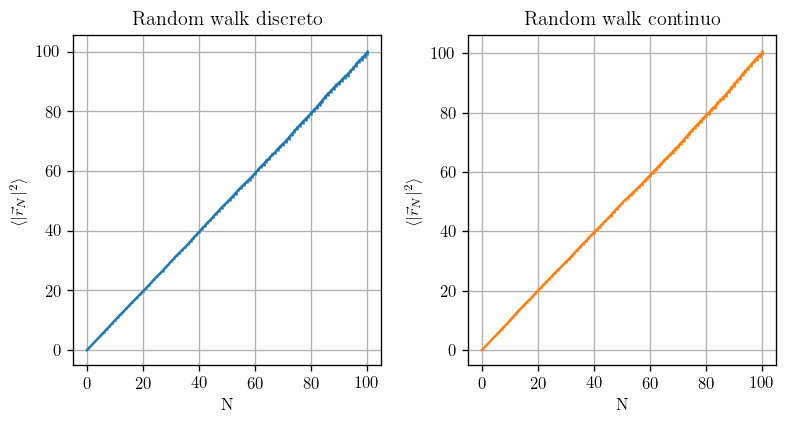

In [2]:
n_discr,avg_discr,err_discr=np.loadtxt("Ex_02_2/out_discr.txt", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="int,float,float", unpack=True)
n_cont,avg_cont,err_cont=np.loadtxt("Ex_02_2/out_cont.txt", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="int,float,float", unpack=True)



fig, axes = plt.subplots(1, 2,figsize=(7,4),dpi=120)

axes[0].errorbar(n_discr,avg_discr,yerr=err_discr)
axes[1].errorbar(n_cont,avg_cont,yerr=err_cont, color="C1")
axes[0].set_title("Random walk discreto")
axes[1].set_title("Random walk continuo")

fig.tight_layout(pad=3)
for ax in axes:
    ax.set_xlabel("N")
    ax.set_ylabel(r'$\langle |\vec{r}_N|^2 \rangle$')
    ax.grid()

Come atteso, l'andamento di $|\vec{r_N}|^2$ in funzione del numero di step è lineare (graficando $|\vec{r_N}|^2$ si capisce immediatamente anche che il coefficiente della relazione lineare è proprio $1$, cosa che non è così evidente nei grafici successivi).
Per passare al grafico di $f(N)=\sqrt{\langle |\vec{r}_N|^2\rangle}$ bisogna propagare correttamente l'incertezza: viene dimezzata l'incertezza relativa di $\langle |\vec{r}_N|^2\rangle$. 

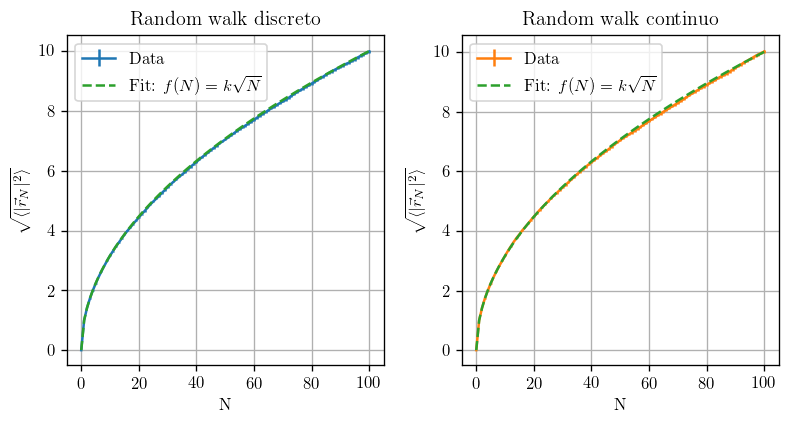

Discrete case: k = 1.0 +/- 1.2e-10
Continuous case: k = 1.0 +/- 1.3e-10


In [3]:
from scipy.optimize import curve_fit

avg_sqrt_discr=np.sqrt(avg_discr)
err_sqrt_discr=0.5*err_discr*np.divide(avg_sqrt_discr, avg_discr, out=np.zeros_like(avg_sqrt_discr), where=avg_discr!=0) 

avg_sqrt_cont=np.sqrt(avg_cont)
err_sqrt_cont=0.5*err_cont*np.divide(avg_sqrt_cont, avg_cont, out=np.zeros_like(avg_sqrt_cont), where=avg_cont!=0) 


fig, axes = plt.subplots(1, 2,figsize=(7,4),dpi=120)

axes[0].errorbar(n_discr,avg_sqrt_discr,yerr=err_sqrt_discr, label="Data")
axes[1].errorbar(n_cont,avg_sqrt_cont,yerr=err_sqrt_cont, label="Data", color="C1")
axes[0].set_title("Random walk discreto")
axes[1].set_title("Random walk continuo")

fig.tight_layout(pad=3)
for ax in axes:
    ax.set_xlabel("N")
    ax.set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}$')
    ax.grid()

def f(x,k):
    return k*np.sqrt(x)


#Per fare il fit considerando le incertezze dei punti, queste devono essere diverse da 0
#Quindi imposto manualmente un'incertezza molto piccola ma diversa da 0
err_sqrt_discr[0]=1E-10
err_sqrt_discr[1]=1E-10
err_sqrt_cont[0]=1E-10
err_sqrt_cont[1]=1E-10

p_opt_discr, p_cov_discr = curve_fit(f, n_discr, avg_sqrt_discr, sigma=err_sqrt_discr, bounds=([0],[5]))
p_opt_cont, p_cov_cont = curve_fit(f, n_cont, avg_sqrt_cont, sigma=err_sqrt_cont, bounds=([0],[5]))


axes[0].errorbar(n_discr, f(n_discr,p_opt_discr[0]),linestyle="dashed",label=r"Fit: $f(N)=k\sqrt{N}$", color="C2")
axes[1].errorbar(n_cont, f(n_cont,p_opt_cont[0]),linestyle="dashed",label=r"Fit: $f(N)=k\sqrt{N}$", color="C2")
axes[0].legend()
axes[1].legend()
plt.show()
print("Discrete case: k = " +str(round(p_opt_discr[0],11))+" +/- " +str(round(np.sqrt(np.diagonal(p_cov_discr))[0],11)) )
print("Continuous case: k = " +str(round(p_opt_cont[0],11))+" +/- " +str(round(np.sqrt(np.diagonal(p_cov_cont))[0],11)) )

Il fit risulta consistente con quanto atteso teoricamente. La costante diffusiva è $D=\frac{a^2}{2\tau}$, dove $a$ è lo spostamento per ogni step e $\tau$ è il tempo tra due step successivi. Si può dimostrare che, in generale $\langle |\vec{r}(t)|^2 \rangle=2Dt=2 \frac{a^2}{2\tau} t=a \frac{t}{\tau}$. Se si considera $t=\tau N$, allora $\langle |\vec{r}_N|^2 \rangle =a^2N$, e quindi $\sqrt{\langle |\vec{r}_N|^2 \rangle}=a\sqrt{N}$. Fittando i dati con la funzione $k\sqrt{N}$, si ottiene un valore del parametro $k$ compatibile con il valore atteso $a$. 

Per osservare meglio l'andamento di $\sqrt{\langle |\vec{r}_N|^2 \rangle}$ con le sue incertezze statistiche ho infine graficato $\sqrt{\langle |\vec{r}_N|^2 \rangle}-a\sqrt{N}$

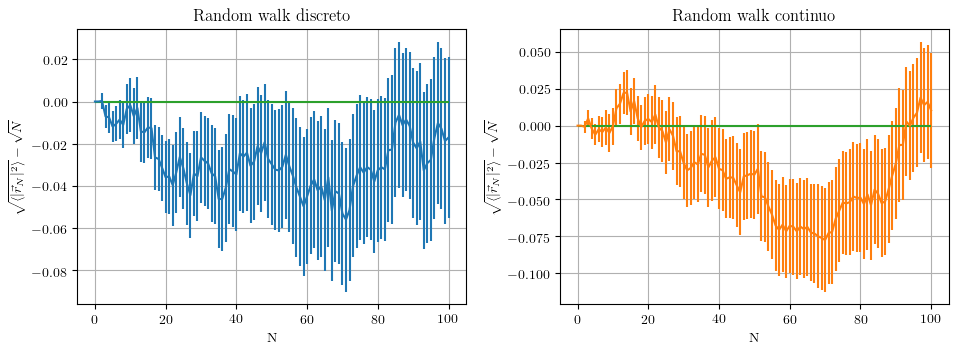

In [4]:
fig, axes = plt.subplots(1, 2,figsize=(10,4),dpi=100)

axes[0].errorbar(n_discr,avg_sqrt_discr-f(n_discr,1),yerr=err_sqrt_discr, label="Data")
axes[1].errorbar(n_cont,avg_sqrt_cont-f(n_cont,1),yerr=err_sqrt_cont, label="Data",color="C1")
axes[0].set_title("Random walk discreto")
axes[1].set_title("Random walk continuo")

fig.tight_layout(pad=3)
for ax in axes:
    ax.set_xlabel("N")
    ax.set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}-\sqrt{N}$')
    ax.grid()
    ax.hlines(0,0,100,color="C2")

Si può osservare la compatibilità statistica tra il valore "misurato" di $\sqrt{\langle |\vec{r}_N|^2 \rangle}$ e quello atteso non solo considerando tutti gli step (ovvero quanto fatto con il fit), ma anche ad ogni singolo step. Si può infine osservare che l'incertezza aumenta con il numero di step: all'inizio l'incertezza sulla distanza è nulla (dopo il primo step, ad esempio, di sicuro il walker si troverà a distanza $a$), man mano che il numero di step aumenta le possibili distanze che può assumere il walker aumentano e quindi aumenta anche l'incertezza.